# Guía 1 - Análisis Exploratorio de Datos

## 1. Introducción

El objetivo de este notebook es que hagamos un repaso de las herramientas del ecosistema de datos de Python y, de paso, que comiencen a familiarizarse con el dataset que utilizaremos en las primeras clases. Si alguno/a siente que necesita un repaso más fuerte de Python, dejamos dos notebooks y algunas referencias que pueden utilizar en la Guia 0.

Durante las primeras clases vamos a trabajar con el dataset de EverythingALS. [Aquí](https://drive.google.com/file/d/1xzZcm4kRHUikSuuI8DRxS6-1OJ41gZn6/view?usp=sharing)
Vamos a dar los primeros pasos dentro de la larga lista de pasos que hacen a un proyecto exitoso de Aprendizaje Automático. El nombre de esta etapa es conocido como Análisis Exploratorio de Datos, y puede ser una de las etapas más entretenidas e instructivas del proceso. Lo que vamos a hacer hoy, entonces, es:


1. Conseguir y abrir los datos.
1. Explorar y visualizar los datos para comenzar a conocer el dataset. Para ello, es importante tener en la cabeza estas preguntas para guiar el trabajo:
    * ¿Qué preguntas podríamos responder con este dataset?¿En qué problemas podemos trabajar?
    * ¿Qué atributos pueden ser útiles?
    * ¿Necesitamos datos adicionales?


#### Resolución

En algunos casos, vamos a dejar una resolución mínima de las consignas para que les sirva de puntapié inicial. ¡Ésta no será la norma! 

### Consigna

Les dejamos una guía preliminar para que comiencen a trabajar. Muchos de esos pasos son generales a cualquier proyecto de Ciencia de Datos. Por ese motivo, es importante ser criteriosos/as para saber cuáles son pertinentes y cuáles no en cada proyecto.

**Ejercicio**: importa las liberías que utilizaremos. Asegurate de tenerlas todas instaladas en el ambiente que creaste.

In [ ]:
import numpy as np
import pandas as pd

### LIBRERIAS PARA GRAFICAR
import matplotlib.pyplot as plt
import seaborn as sns

**Ejercicio**. Descargar el archivo "EALS_data.csv". Abrirlo con Pandas y responder:

* ¿Qué tipo de archivo es? 
* Imprima sus primeros cinco elementos. 

_Pista: Considere el uso de metodos `pd.read_csv()`, `.head()`. Puede ver su documentacion colocando el signo `?` luego del metodo y ejecutando la celda, e.g. `pd.read_csv?`._


Cargamos los datos e imprimos las cinco primeras filas del DataFrame.

In [4]:
data = pd.read_csv('C://Users//Usuario//aprendizajeautomatico//IntroduccionAprendizajeAutomatico//res//EALS_data_con_features_1C_2024.csv', parse_dates=['UTC_date', 'onset_date'])
data.head()

,user_id,session_id,pac,onset_date,site_of_onset_bulbar,UTC_date,years_since_first_session,years_since_onset,alsfrsr_1,alsfrsr,bulbar,speaking_rate,intelligibility
0,0,0,False,NaT,NaN,2022-10-14,0.000000,NaN,4.0,48.0,12.0,2.971188,0.834333
1,0,1,False,NaT,NaN,2022-10-22,0.021918,NaN,4.0,48.0,12.0,3.003641,0.830616
2,0,2,False,NaT,NaN,2022-10-29,0.041096,NaN,4.0,48.0,12.0,3.360489,0.832606
3,0,3,False,NaT,NaN,2022-11-06,0.063014,NaN,4.0,48.0,12.0,3.101504,0.846495
4,0,4,False,NaT,NaN,2022-11-12,0.079452,NaN,4.0,48.0,12.0,3.140863,0.836162


**Ejercicio:** ¿Cuántas columnas tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Pistas: `.shape`, `.columns`.

In [5]:
print(data.shape)

(3364, 13)


El dataset tiene 3364 filas, 13 columnas. Sus nombres son:

In [6]:
data.columns

Index(['user_id', 'session_id', 'pac', 'onset_date', 'site_of_onset_bulbar',
       'UTC_date', 'years_since_first_session', 'years_since_onset',
       'alsfrsr_1', 'alsfrsr', 'bulbar', 'speaking_rate', 'intelligibility'],
      dtype='object')

## 2. Descripción del conjunto de datos

Los usuarios (`user_id`) pueden ser controles o pacientes (`pac`). Cada cierta cantidad de días, los usuarios se graban haciendo una serie de tareas. Cada grabación es una sesión (`session_id`), que tiene una fecha (`UTC_date`). Respecto a los pacientes, tenemos cuándo arrancan con la enfermedad (`onset_date`), y si sus síntomas arrancan en el centro bulbar (`site_of_onset_bulbar`).

Luego hay unos valores de una escala típica del ALS, la [ALSFRS-R](https://www.encals.eu/wp-content/uploads/2017/12/ALSFRS-R-Spanish-version.pdf). Es una escala autoreportada sobre distintas actividades cotidianas (hablar, comer, tragar, etc.). Son 12 preguntas que van de 0 a 4 (0 peor valor, 4 mejor valor), pero no están todas las preguntas. Sólo está la primera (`alsfrsr_1`), que está relacionada con el habla; la suma de las tres primeras relacionadas con el habla y el tracto vocal (`bulbar`, de 0 a 12, pero nadie puede tener 0) y la suma de las 12 preguntas (`alsfrsr`, de 0 a 48, pero nadie puede tener 0 ni valores muy bajos).

Finalmente, pueden encontrar dos atributos, `speaking_rate` y `intelligibility`. El primero está asociado a la velocidad del habla (palabras por segundo), y el segundo - como su nombre indica - a la inteligibilidad.


**Ejercicio:** ¿Cuántos usuarios hay?¿Cuántos controles y cuántos pacientes?¿Cuál es el promedio de sesiones por usuarios?¿Cuáles son los usuarios con mayor y menor número de sesiones?

Pista: las funciones `.nunique()` y `.groupby()` pueden ser útiles.

In [7]:
data.user_id.nunique()

160

In [8]:
data.groupby('pac').user_id.nunique()

pac
False    80
True     80
Name: user_id, dtype: int64

In [9]:
#promedio de sesiones
print(sum(data.groupby("user_id").size()) / data.user_id.nunique())

#usuarios con mayor cantidad de sesiones
print(data.groupby("user_id").size().sort_values(ascending=False).head(5))

#usuarios con menor cantidad
print(data.groupby("user_id").size().sort_values().head(5))

21.025
user_id
36     76
24     74
141    74
133    62
27     61
dtype: int64
user_id
79     1
110    1
96     1
113    1
37     1
dtype: int64


**Ejercicio:** realizar un histograma de la cantidad de sesiones por usuario. Luego, repetir el gráfico, pero haciendo un histograma por cada grupo.

Text(0.5, 0, 'Número de sesiones por usuario')

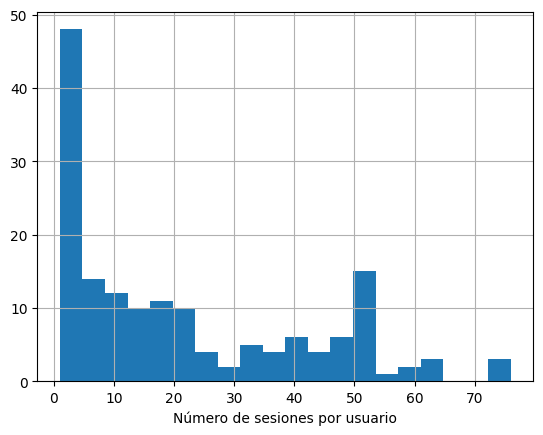

In [10]:
data.groupby('user_id').session_id.nunique().hist(bins = 20)
plt.xlabel('Número de sesiones por usuario')

Text(0, 0.5, 'Cuentas')

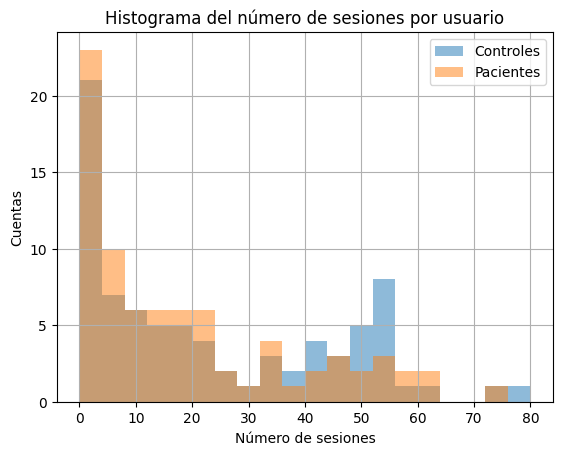

In [11]:
data.query('not pac').groupby('user_id').session_id.nunique().hist(bins = np.linspace(0,80, 21), alpha = 0.5, label = 'Controles')
data.query('pac').groupby('user_id').session_id.nunique().hist(bins = np.linspace(0,80, 21), alpha = 0.5, label = 'Pacientes')
plt.legend()
plt.title('Histograma del número de sesiones por usuario')
plt.xlabel('Número de sesiones')
plt.ylabel('Cuentas')

**Ejercicio:** estudiar las distribuciones de las columnas asociadas al ALSFRS-R. Pistas: para variables continuas, puedes usar histogramas. Para variables categóricas, puede ser útil la función `value_counts()` de Pandas o usar gráficos de barras. ¿Cómo varían las distribuciones al separar por grupo?

Text(0, 0.5, 'CuentasCantidad')

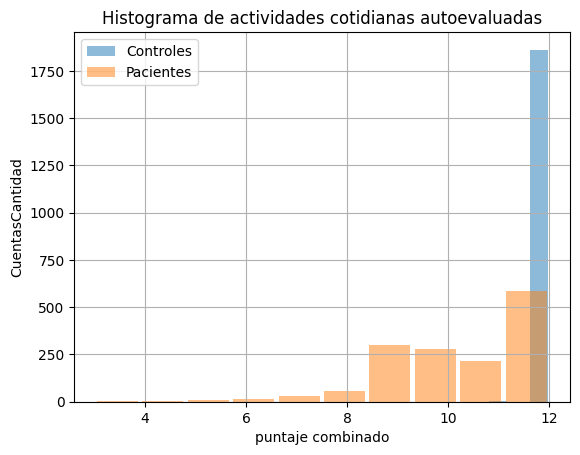

In [12]:
data.groupby('pac').bulbar.hist(alpha = 0.5, rwidth=0.9)
plt.legend(['Controles', 'Pacientes'])
plt.title('Histograma de actividades cotidianas autoevaluadas')
plt.xlabel('puntaje combinado')
plt.ylabel('CuentasCantidad')


In [13]:
tira_de_numeros = np.random.choice([0,67], size = 1000, replace=True, p=[0.75,0.25])
tira_de_numeros

array([ 0,  0,  0,  0, 67,  0,  0, 67,  0, 67,  0,  0,  0,  0,  0,  0,  0,
        0, 67,  0,  0,  0, 67,  0,  0, 67,  0,  0,  0,  0,  0,  0, 67, 67,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 67,  0,  0,  0,  0, 67,  0,  0,
        0,  0,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0, 67,  0,  0,  0,  0,
        0,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       67,  0,  0, 67,  0, 67, 67,  0, 67,  0, 67,  0,  0,  0,  0,  0,  0,
       67, 67,  0,  0,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       67,  0,  0,  0,  0,  0,  0, 67,  0,  0,  0,  0, 67, 67,  0,  0,  0,
        0,  0, 67,  0,  0, 67,  0,  0, 67, 67,  0, 67, 67,  0,  0,  0,  0,
        0, 67, 67,  0,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,  0, 67,  0,
       67,  0, 67,  0,  0,  0, 67, 67,  0,  0, 67,  0, 67,  0,  0,  0, 67,
        0,  0,  0, 67,  0,  0,  0, 67,  0, 67,  0,  0,  0,  0,  0,  0, 67,
        0,  0, 67,  0,  0,  0,  0,  0, 67,  0,  0,  0, 67,  0, 67, 67,  0,
        0,  0,  0,  0,  0

(array([78.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 21.8]),
 array([ 0. ,  6.7, 13.4, 20.1, 26.8, 33.5, 40.2, 46.9, 53.6, 60.3, 67. ]),
 <BarContainer object of 10 artists>)

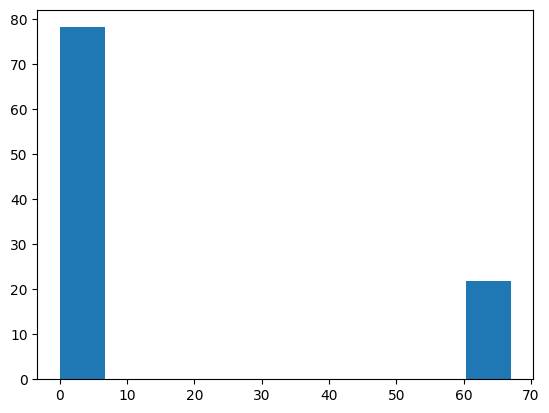

In [14]:
plt.hist(tira_de_numeros, density=False, weights=100*np.ones_like(tira_de_numeros)/len(tira_de_numeros))

<Axes: >

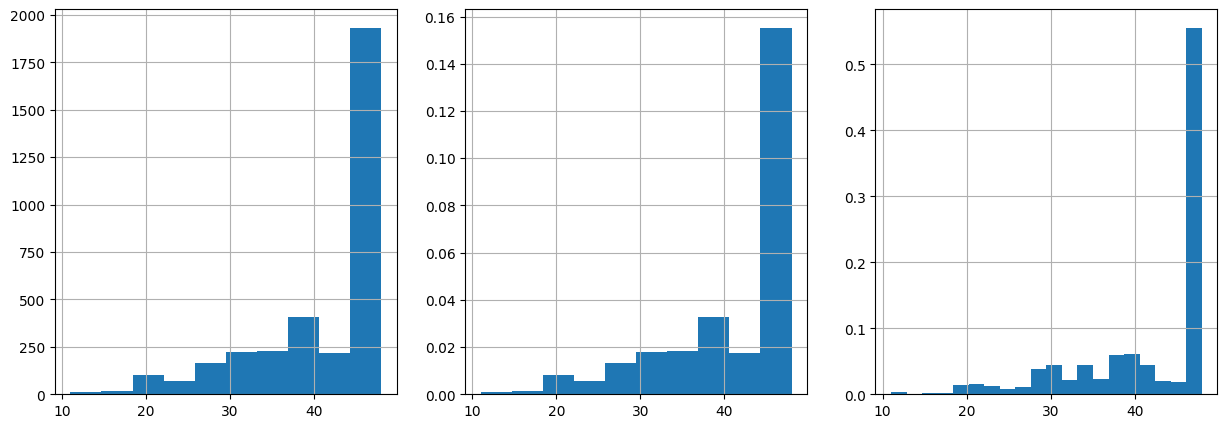

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
(data.alsfrsr).hist(density=False, ax = axs[0])
(data.alsfrsr).hist(density=True, ax = axs[1])

### ADD histogram of frequencies in each bin
(data.alsfrsr).hist(density=False, ax = axs[2], weights=np.ones_like(data.alsfrsr)/len(data.alsfrsr), bins = 20)

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# # Primer histograma (sin densidad)
# data['alsfrsr'].hist(density=False, ax=axs[0], bins=35)
# axs[0].set_title('Histograma sin densidad')
# axs[0].set_xlabel('Valor')
# axs[0].set_ylabel('Frecuencia')

# # Segundo histograma (con densidad)
# data['alsfrsr'].hist(density=True, ax=axs[1],bins=35)
# axs[1].set_title('Histograma con densidad')
# axs[1].set_xlabel('Valor')
# axs[1].set_ylabel('Densidad')

# # Tercer histograma (frecuencias en cada bin)
# data['alsfrsr'].hist(ax=axs[2], weights=np.ones_like(data['alsfrsr']) / len(data['alsfrsr']), bins=35)
# axs[2].set_title('Histograma con frecuencias normalizadas')
# axs[2].set_xlabel('Valor')
# axs[2].set_ylabel('Frecuencia normalizada')

# plt.tight_layout()
# plt.show()


<Axes: >

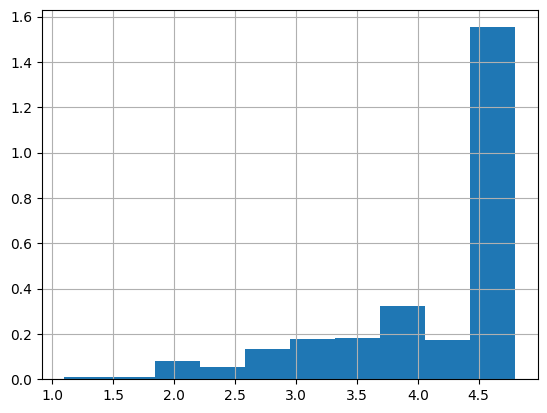

In [16]:
(data.alsfrsr/10).hist(density=True)

In [ ]:
### COMPLETAR

## 3. Atributos

**Para pensar.** Ahora que tienes una idea de lo que hay en el dataset, vuelve sobre estas preguntas: 

* ¿Qué preguntas podríamos responder con este dataset?¿En qué problemas podemos trabajar?
* ¿Qué atributos pueden ser útiles? Explora `speaking_rate` y `intelligibility`.
* ¿Necesitamos datos adicionales?

Recomendamos discutirlas en grupo y con los y las docentes. No te preocupes si te parece difícil, ya que esas preguntas requieren conocimiento experto del tema. Sin embargo, siempre vale la pena hacer ese ejercicio.

Una vez que lo hayas pensado y debatido, sigue con el notebook más abajo. 


**Ejercicio** Interpreta el siguiente gráfico. Si es necesario, modifica algunos de sus límites y parámetros para que sea más claro.

Text(0, 0.5, 'Claridad del habla')

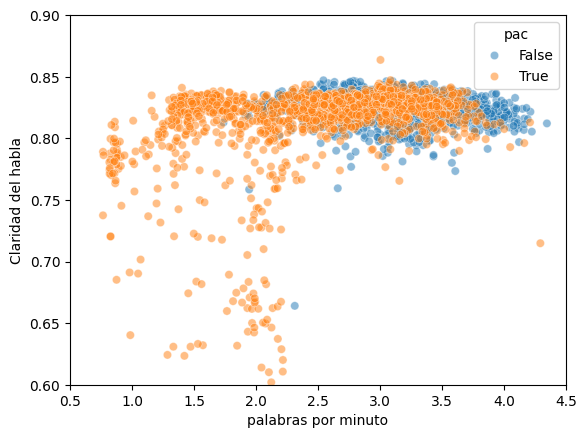

In [17]:
sns.scatterplot(x='speaking_rate', y = 'intelligibility', data=data, hue='pac', alpha=0.5)
plt.xlim(0.5, 4.5)
plt.ylim(0.6, 0.9)
plt.xlabel('palabras por minuto')
plt.ylabel('Claridad del habla')

1) hacer histograma de interllegibility separando por grupo
2) como varia la `speaking_rate` y `intelligibility` segun ALSFRS-R

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


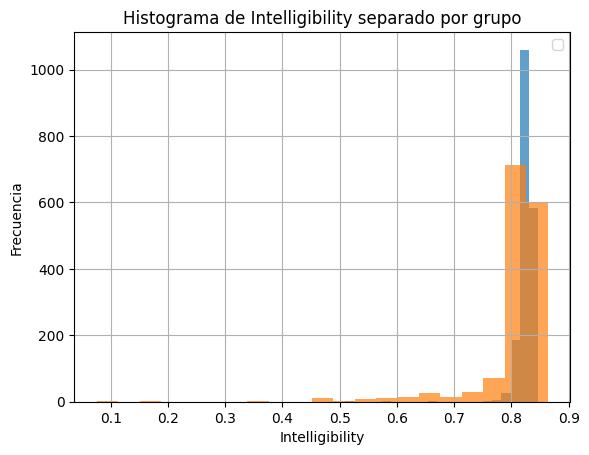

In [29]:
data.query("not pac").intelligibility.hist(alpha = 0.7, bins=21)
data.query("pac").intelligibility.hist(alpha = 0.7, bins=21)
plt.title('Histograma de Intelligibility separado por grupo')
plt.xlabel('Intelligibility')
plt.ylabel('Frecuencia')
plt.legend()

TypeError: 'Series' object is not callable

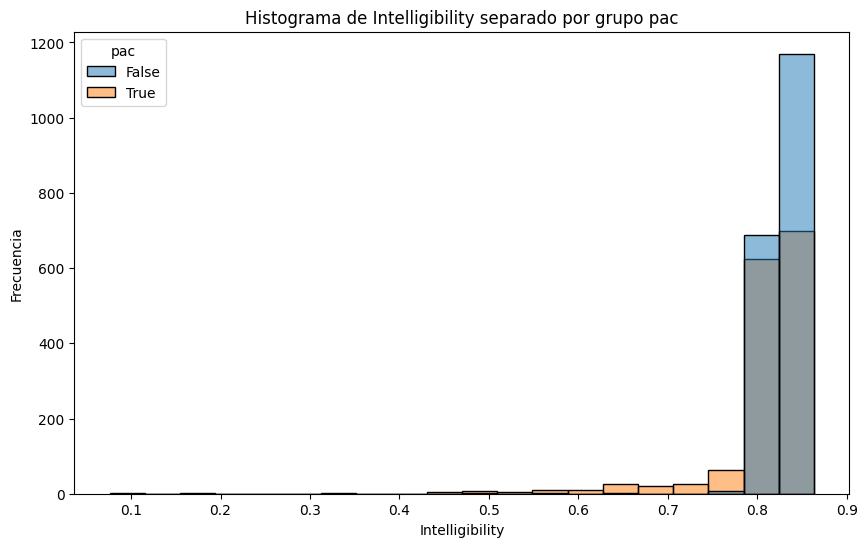

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='intelligibility', hue='pac', bins=20)
plt.title('Histograma de Intelligibility separado por grupo pac')
plt.xlabel('Intelligibility')
plt.ylabel('Frecuencia')
plt.legend(data.pac())
plt.show()

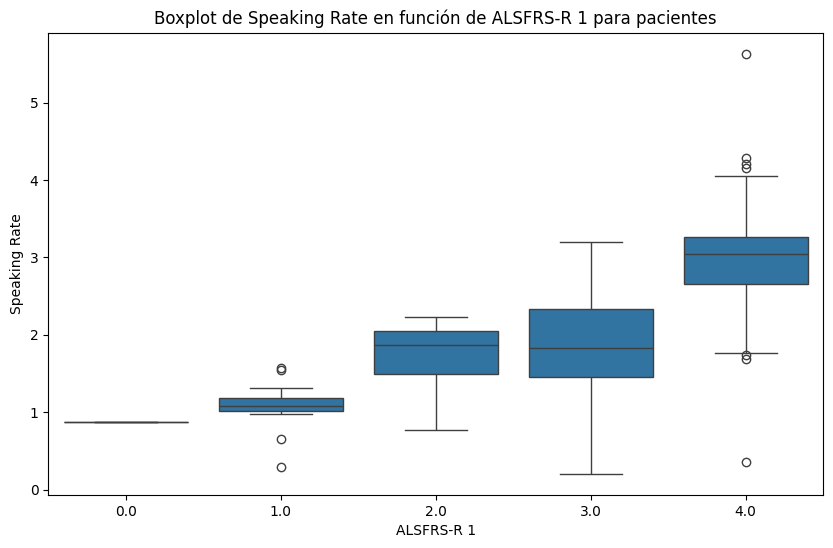

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[data['pac'] == True], x='alsfrsr_1', y='speaking_rate')
plt.title('Boxplot de Speaking Rate en función de ALSFRS-R 1 para pacientes')
plt.xlabel('ALSFRS-R 1')
plt.ylabel('Speaking Rate')
plt.show()

##interpretacion: a medida que disminuye el score en alsfrs-r 1, (la gente empeora), tiende a bajar la velocidad de habla

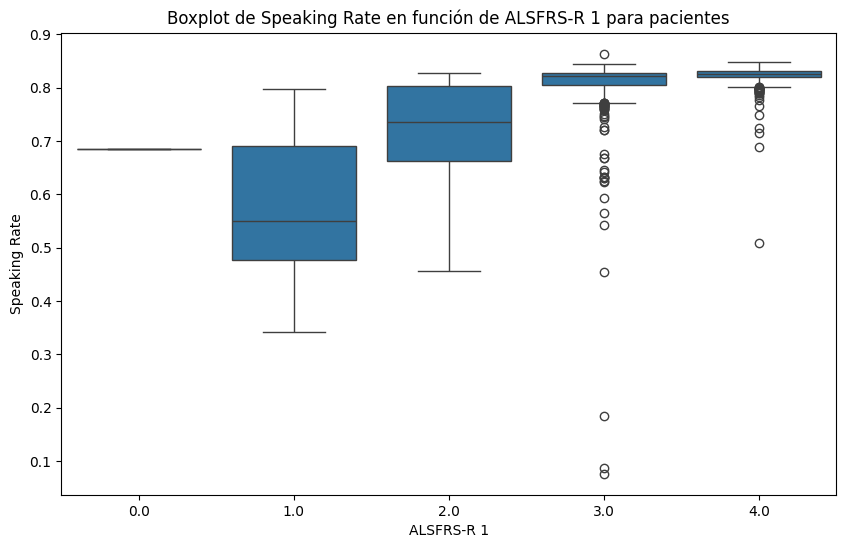

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[data['pac'] == True], x='alsfrsr_1', y='intelligibility')
plt.title('Boxplot de Speaking Rate en función de ALSFRS-R 1 para pacientes')
plt.xlabel('ALSFRS-R 1')
plt.ylabel('Speaking Rate')
plt.show()

#interpretacion: a medida que avanza la enfermedad, se dispersan los datos,

**Ejercicio - Calidad de los datos**. 

Estudiar si hay:    
1. Valores Faltantes
1. Entradas duplicadas
1. Valores atípicos
1. Consistencia interna. Esto refiere a estudiar si no hay información contradictoria en el DataFrame. Qué estudiar dependerá del objetivo del análisis, por lo que puede ser difícil hacerlo sin un objetivo claro.
   

**Valores faltantes**

In [39]:
data.isna().sum()

user_id                         0
session_id                      0
pac                             0
onset_date                   1866
site_of_onset_bulbar         1886
UTC_date                        0
years_since_first_session       0
years_since_onset            1866
alsfrsr_1                       0
alsfrsr                         0
bulbar                          0
speaking_rate                   0
intelligibility                 0
dtype: int64

Sin embargo, estos datos faltantes no nos molestan. ¿Por qué?

In [40]:
duplicados = data.duplicated().sum()
print("Número de entradas duplicadas:", duplicados)


Número de entradas duplicadas: 0
